In [48]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

In [49]:
def back_substitution(U, y):
    n = U.shape[1]
    x = np.zeros_like(y, dtype=np.double)
    x[-1] = y[-1] / U[-1, -1]
    for i in range(n - 2, -1, -1):
        x[i] = (y[i] - np.dot(U[i, i:], x[i:])) / U[i, i]

    return x

def linsolve_qr(A, b):
    num_param = A.shape[1]
    q, r = scipy.linalg.qr(A) # Q*R*p = y
    return back_substitution(r[0:num_param], (q.T @ b)[0:num_param]) # solve for: R*p = Q.T * y


def gauss_newton(f, df, x, tolerance=1e-14, max_step=100):
    step = 0
    error = np.linalg.norm(f(x))
    while error > tolerance and step < max_step:
        # print(step, x, error)
        x += linsolve_qr(df(x), -f(x))
        error = np.linalg.norm(f(x))
        step += 1

    return x

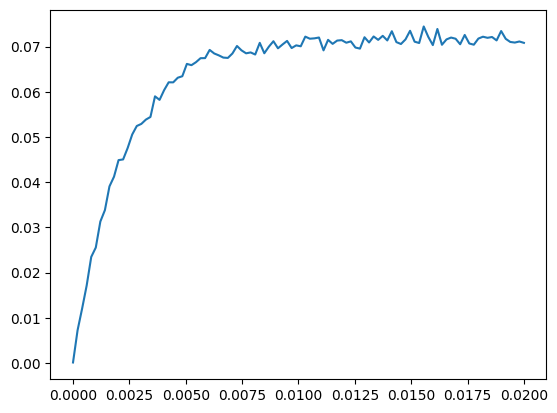

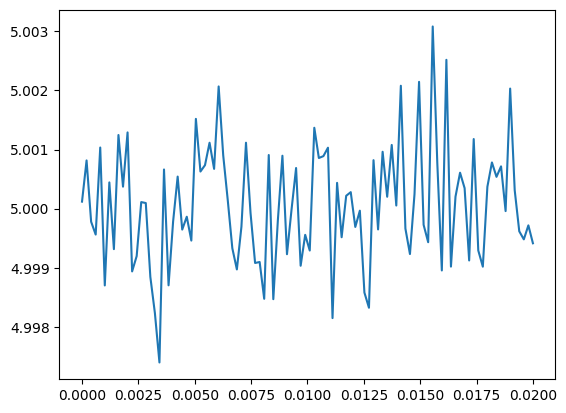

In [50]:
data = np.genfromtxt('7_dataAufgabe1.txt')

t = data[:,0]
i = data[:,1]
u = data[:,2]

plt.plot(t, i)
plt.show()

plt.plot(t, u)
plt.show()

In [51]:
u0 = 5

def f(p):
    (r, l) = p
    return u0 / r * (1- np.exp(-r/l*t)) - i


def df(p):
    (r, l) = p
    return np.array([
        t * u0 * np.exp(-t*r / l) / (l*r) - u0 * (1- np.exp(-t*r / l)) / r**2, 
        -t * u0 * np.exp(-r * t / l) / l**2
    ]).T

(r, l) = gauss_newton(f, df, np.array([0.1, 0.1]))
print((r, l))

(69.83301357673913, 0.15149247367229052)
